# M2 Innovation Technologique et Entrepreunariat
## Introduction au Machine Learning en situation

Auteur: J. Jakubowicz

Date: 4 octobre 2018

Dans ce notebook, on illustre l'intérêt des forêts aléatoires et du boosting en utilisant les données du challenge Kaggle intitulé `Give Me Some Credit`

## 0. Préliminaires

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Chargement des données

Il existe plusieurs manières de charger un fichier csv en mémoire avec Python. Ici on utilisera directement une des plus puissantes pour arriver à un résultat qui soit très proche de ce qu'on écrit en R : on utilise la librairie [pandas](http://pandas.pydata.org)

In [5]:
import pandas as pd

datapath = "./"
trainf = "cs-training.csv"
dataf = datapath + trainf

In [6]:
dataf

'./cs-training.csv'

In [7]:
pd.read_csv(dataf)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


On se rend compte que [pandas](http://pandas.pydata.org) crée automatiquement une colonne index qui fait double emploi avec la colonne anonyme du fichier csv.

On décide donc d'utiliser directement cette colonne comme index.

In [8]:
pd.read_csv(dataf,index_col=0)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


On enregistre le résultat dans `train`. Comme dans le code R.

In [9]:
train = pd.read_csv(dataf,index_col=0)
features_names = list(train)[1:]

In [10]:
features_names

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

Mais au fait, quel est la classe de cet objet ? ...
Facile, en python, comme en R, on peut utiliser le REPL pour répondre à ce genre de question

In [11]:
type(train)

pandas.core.frame.DataFrame

In [12]:
train.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## 2. Préparation des folds

On pourrait utiliser [`sklearn.cross_validation`](http://scikit-learn.org/stable/modules/cross_validation.html#k-fold) pour préparer les folds mais on le fait "à la main" pour cette première fois.

In [13]:
import random
def kfolds(k,N,seed=None):
    random.seed(seed)
    out = [ list() for _ in range(k) ]
    for n in range(N): out[random.randrange(k)].append(n)
    return(out)

K = kfolds(seed=3894,k=5,N=len(train))
fold1 = sum(K[1:5],[]) # K[1] + K[2] + K[3] + K[4]
xtrain = train.iloc[fold1][train.keys()[1:]]
ytrain = train.iloc[fold1][train.keys()[0]]

On n'affiche pas K dans la mesure où N est relativement grand pour être affiché (15 000)

## 3. Imputation des données manquantes

Le code suivant remplace tous les NaN par la médiane de la colonne correspondante. C'est une stratégie un peu différente du code `gbm` en R.

In [14]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
train = imp.fit_transform(train)
xtrain = train[fold1,1:]
ytrain = train[fold1,0]
xtest = train[K[0],1:]
ytest = train[K[0],0]

## 4. GLM

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

On calcule le score sur le fold restant

In [16]:
from sklearn.metrics import roc_auc_score, log_loss
lr_preds = lr.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, lr_preds)))
print("log_loss: {}".format(log_loss(ytest,lr_preds)))

auc:      0.6916138133181741
log_loss: 0.22889218213255214


## 5. Support Vector Machines

In [17]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(xtrain,ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [18]:
svm_preds = svm.predict(xtest)
print("auc:      {}".format(roc_auc_score(ytest, svm_preds)))
print("log_loss: {}".format(log_loss(ytest,svm_preds)))

auc:      0.51898704652422
log_loss: 2.242447721499643


## 6. Gradient Boosted Machines

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(loss='exponential')
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [27]:
gbm_oc = GradientBoostingClassifier()
gbm_oc.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Une fois entraîné, on utilise le modèle pour prédire sur le fold 1.

In [28]:
gbm_preds = gbm.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_preds)))

auc:      0.865498963529702
log_loss: 0.1771687943711408


## 7. Changer les paramètres

In [30]:
gbm = GradientBoostingClassifier(loss="deviance",
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 max_depth=5,
                                 subsample=0.75,
                                 verbose=1)
gbm.fit(xtrain, ytrain)
gbm_preds = gbm.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_preds)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4537           0.0360           25.76s
         2           0.4338           0.0197           29.63s
         3           0.4176           0.0134           26.89s
         4           0.4090           0.0101           30.20s
         5           0.4015           0.0079           31.14s
         6           0.3956           0.0065           30.41s
         7           0.3891           0.0053           29.00s
         8           0.3853           0.0044           27.98s
         9           0.3795           0.0035           27.61s
        10           0.3779           0.0030           26.76s
        20           0.3566           0.0006           21.57s
        30           0.3529           0.0000           17.91s
        40           0.3473          -0.0001           15.15s
        50           0.3446          -0.0000           12.52s
        60           0.3408           0.0001            9.90s
       

Qui nous donne un résultat comparable aux paramètres par défaut; légèrement moins bon même.

## 8. Impact du nombre d'arbres

In [31]:
aucs = [ roc_auc_score(ytest, gbm_pred[:,1]) for gbm_pred in gbm.staged_predict_proba(xtest) ]

Puis pour le plot:

Text(0,0.5,'AUC')

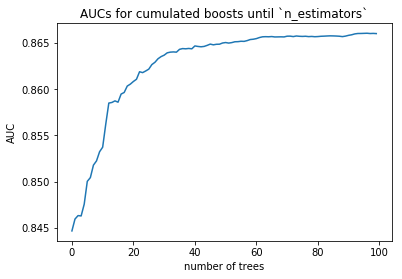

In [32]:
import matplotlib.pyplot as plt
plt.plot(aucs)
plt.title("AUCs for cumulated boosts until `n_estimators`")
plt.xlabel("number of trees")
plt.ylabel("AUC")

On voit donc qu'en terme d'AUC, on fait du surapprentissage au delà d'une cinquantaine d'arbres

## 9. Importance des variables et dépendances partielles

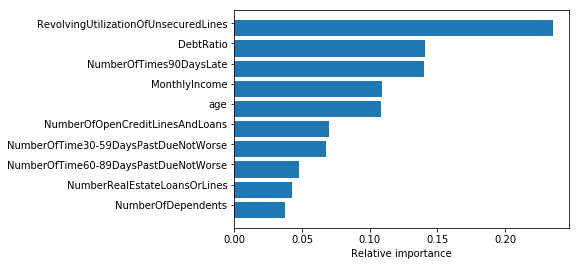

In [33]:
import numpy as np
# sort importances
indices = np.argsort(gbm.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(features_names)), gbm.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

['NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate']


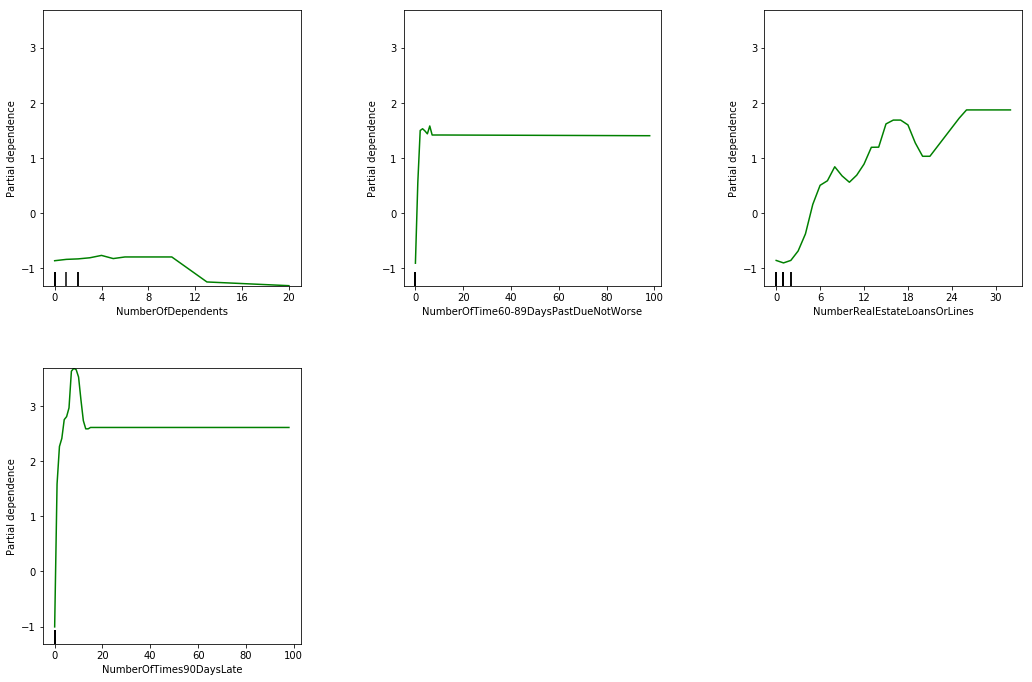

In [35]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
features =  [u'RevolvingUtilizationOfUnsecuredLines',
             u'age',
             u'NumberOfTime30-59DaysPastDueNotWorse',
             u'DebtRatio', u'MonthlyIncome',
             u'NumberOfOpenCreditLinesAndLoans',
             u'NumberOfTimes90DaysLate',
             u'NumberRealEstateLoansOrLines',
             u'NumberOfTime60-89DaysPastDueNotWorse',
             u'NumberOfDependents',
             (u'RevolvingUtilizationOfUnsecuredLines',u'NumberOfTimes90DaysLate'),
             (u'MonthlyIncome',u'age')
            ]
top4 = features_names[-1:-5:-1]
print(top4)
_ = plot_partial_dependence(gbm, xtrain, top4,
                            feature_names=features_names,figsize=(16,16))

Scikit-learn offre aussi la possibilité de visualiser l'effet de couples de variables:

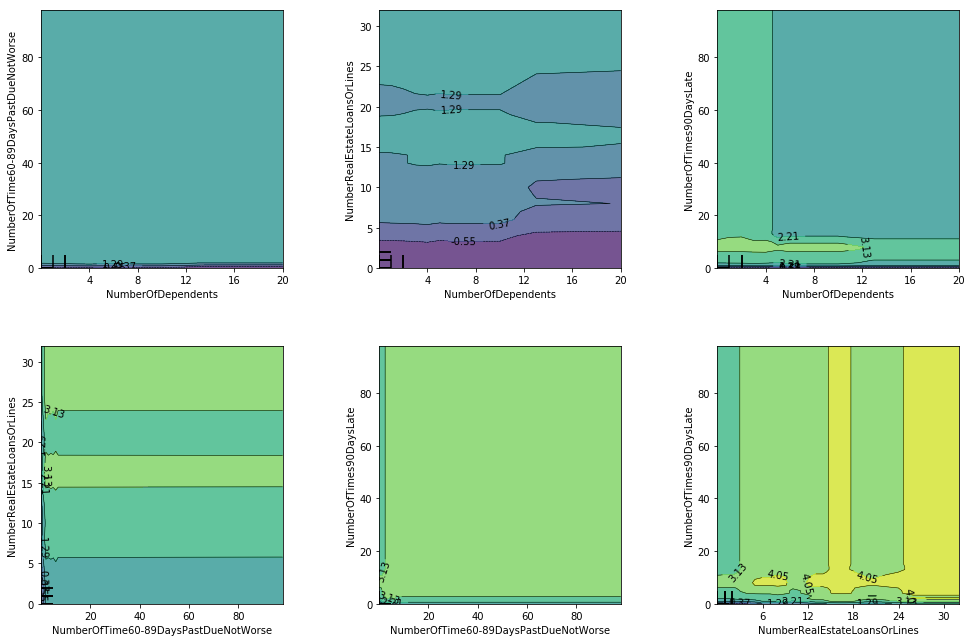

In [37]:
from itertools import combinations

_ = plot_partial_dependence(gbm, xtrain, combinations(top4,2),
                        feature_names=features_names, figsize=(15,15))

## 10. Forêts Aléatoires

In [46]:
import multiprocessing
num_cores = multiprocessing.cpu_count()
from sklearn.cross_validation import KFold
kf = list(KFold(len(xtrain),num_cores))

from joblib import Parallel, delayed  

from sklearn.ensemble import RandomForestClassifier

def fit_model(traini):
    rfc = RandomForestClassifier()
    rfc.fit(xtrain[traini], ytrain[traini])
    return(rfc)

kf = list(KFold(len(xtrain),num_cores))
rfcs = Parallel(n_jobs=num_cores)( delayed(fit_model)(traini) for traini,_ in kf)
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = rfcs[i].predict_proba(xtrain[testi])[:,1]
print("auc:      {}".format(roc_auc_score(ytrain, preds)))
print("log_loss: {}".format(log_loss(ytrain,preds)))

auc:      0.7829162848740986
log_loss: 0.7134856969703802


On voit que les résultats sont moins bons que pour les Boosted Models avec les paramètres par défaut. On cherche donc à voir s'il existe des paramètres qui donnent une meilleure AUC. Ici on utilise `GridSearchCV`, `cross_val_score` et le paramètre `n_jobs` qui sont des outils très pratiques de `scikit-learn`. En réalité `n_jobs` fait appel à `joblib` et on aurait pu l'utiliser pour les GBM également, tout comme `GridSearchCV` et `cross_val_score`. L'idée étant d'aborder les problèmes et les outils sous différents angles pour mieux les cerner.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
#Uncomment the following for GridSearch: can take 1+ hour
#from sklearn.grid_search import GridSearchCV
#gs = GridSearchCV(RandomForestClassifier(n_jobs=-1), 
#                  {'max_features' : range(1,11), 'n_estimators': [500]}, 
#                  scoring='roc_auc')
#gs.fit(xtrain,ytrain)
#print(gs.best_params_) #Outputs {'max_features':1, 'n_estimators' : 500}
cross_val_score(RandomForestClassifier(max_features=1,n_estimators=500,n_jobs=-1),
                xtrain, ytrain, cv=num_cores, scoring='roc_auc').mean()

KeyboardInterrupt: 

On peut, comme pour les GBM, utiliser le modèle appris pour classer les variables par ordre d'importance.

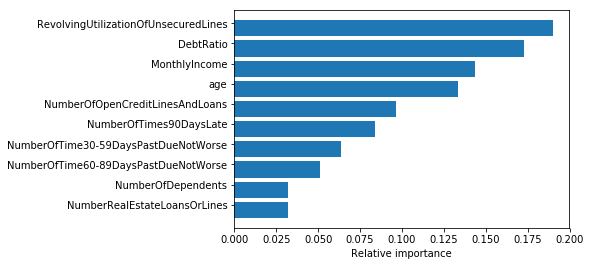

In [48]:
rfc = RandomForestClassifier(n_estimators=500,max_features=1,n_jobs=-1)
rfc.fit(xtrain,ytrain)
indices = np.argsort(rfc.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(features_names)), rfc.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

On constate que c'est le même ordre d'importance que pour le GBM estimé plus haut.

## 11. Mélange

In [ ]:
def fit_gbm(traini):
    gbm = GradientBoostingClassifier(loss="deviance",
                                     n_estimators = 100,
                                     learning_rate = 0.1,
                                     max_depth = 5,
                                     subsample = .75,
                                     verbose = 0)
    gbm.fit(xtrain[traini],ytrain[traini])
    return(gbm)

gbms = Parallel(n_jobs=num_cores)( delayed(fit_gbm)(traini) for traini,_ in kf)

def fit_rfc(traini):
    rfc = RandomForestClassifier(n_estimators=500,max_features=1)
    rfc.fit(xtrain[traini],ytrain[traini])
    return(rfc)

rfcs = Parallel(n_jobs=num_cores)( delayed(fit_rfc)(traini) for traini,_ in kf)

In [ ]:
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = (.07*rfcs[i].predict_proba(xtrain[testi])[:,1] +
                    .93*gbms[i].predict_proba(xtrain[testi])[:,1])
print("auc:      {}".format(roc_auc_score(ytrain, preds)))
print("log_loss: {}".format(log_loss(ytrain,preds)))

## 12. Prédictions sur les données de test en csv

In [ ]:
gbm = GradientBoostingClassifier(loss="deviance",
                                 n_estimators = 100,
                                 learning_rate = 0.1,
                                 max_depth = 5,
                                 subsample = .75,
                                 verbose = 0)
gbm.fit(xtrain,ytrain)
rfc = RandomForestClassifier(n_estimators=500,
                             max_features=1)
rfc.fit(xtrain,ytrain)

testname = "cs-test.csv"
testf = datapath + testname
test = pd.read_csv(testf,index_col=0)
test = imp.fit_transform(test)

preds = .07*rfc.predict_proba(test)[:,1] + .93*gbm.predict_proba(test)[:,1]

On peut vouloir stocker les prédictions sur disque sous forme de fichier csv

In [ ]:
np.savetxt('preds.csv', preds, delimiter =',')